In [1]:
%run ../stochastic_fractal_m.py

In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import json
import numpy as np

dir_data = "../data/number_length/p=0.25,alpha=2/"
os.listdir(dir_data)

['StochasticFragmentationNumberLength_time-iteration_1000000_ensemble_10000_20200919_210411.txt',
 'StochasticFragmentationNumberLength_time-iteration_1000000_ensemble_10000_20200920_051248.txt',
 'StochasticFragmentationNumberLength_time-iteration_1000000_ensemble_10000_20200919_165241.txt',
 'StochasticFragmentationNumberLength_time-iteration_1000000_ensemble_10000_20200920_151121.txt']

In [3]:
## Getting the true lengths and plotting kde plot
# help(TrueLengths)

# Fractal dimensions

Ensemble size = 50,000

Max Time iteration = 1,000,000

initial time to record data = 100,000

number of data points = 20



| $alpha$  |    $p$   | actual $d_f$ | simulation $d_f$ |
|----------|:--------:|------:|------:|
| 2 |  0.75 | 1600 |
| 3 |  0.75 | 12  |
| 2 |  0.50 |    0.541381 | 0.539152
| 3 |  0.50 |    0.555779 | 0.597432
| 2 |  0.25 |    0.283882 | 0.282004
| 3 |  0.25 |    0.296196 | 0.295501

## Number length

In [4]:
sfl = NumberLength(alpha=2, probability=0.25)
sfl.log(True)

kwargs  {'alpha': 2, 'probability': 0.25}


In [5]:
sfl.run(10000, 5000, 10)

array([[3.        , 0.08142577],
       [3.        , 0.08142577],
       [3.        , 0.08142577],
       [3.        , 0.08142577],
       [3.        , 0.08142577],
       [3.        , 0.08142577],
       [3.        , 0.08142577],
       [3.        , 0.08142577],
       [3.        , 0.08142577],
       [3.        , 0.08142577]])

In [6]:
data = sfl.run_ensemble(10_000, 1_000_000, 100_000, 50)

realization  0  . Time spent  8.344650268554688e-06  sec
realization  100  . Time spent  177.43201518058777  sec
realization  200  . Time spent  162.6637511253357  sec
realization  300  . Time spent  151.4317798614502  sec
realization  400  . Time spent  157.51749205589294  sec
realization  500  . Time spent  146.1482207775116  sec
realization  600  . Time spent  172.4371519088745  sec
realization  700  . Time spent  174.12798714637756  sec
realization  800  . Time spent  159.57828545570374  sec
realization  900  . Time spent  155.22762298583984  sec
realization  1000  . Time spent  153.5796504020691  sec
realization  1100  . Time spent  175.82083582878113  sec
realization  1200  . Time spent  169.22662591934204  sec
realization  1300  . Time spent  199.26670241355896  sec
realization  1400  . Time spent  193.3172242641449  sec
realization  1500  . Time spent  179.82528233528137  sec
realization  1600  . Time spent  153.34966373443604  sec
realization  1700  . Time spent  154.003840208

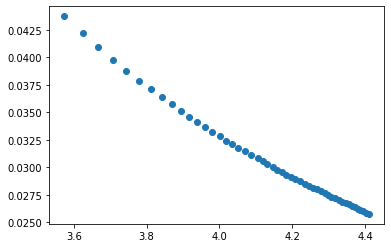

In [7]:
filename = dir_data + sfl.get_filename()
header_js = sfl.get_header(
    {"columns":['number of particles', 'sum of surviving particle sizes'],
     "type":"ensemble average"     
    }
)
np.savetxt(filename, data, header=json.dumps(header_js))

tmp = np.loadtxt(filename)
plt.plot(tmp[:,0], tmp[:,1], 'o')

In [ ]:
sfl = NumberLength(alpha=2, probability=0.25)
sfl.log(True)

data = sfl.run_ensemble(10_000, 1_000_000, 100_000, 50)

In [ ]:
filename = dir_data + sfl.get_filename()
header_js = sfl.get_header(
    {"columns":['number of particles', 'sum of surviving particle sizes'],
     "type":"ensemble average"     
    }
)
np.savetxt(filename, data, header=json.dumps(header_js))

tmp = np.loadtxt(filename)
plt.plot(tmp[:,0], tmp[:,1], 'o')

In [38]:
N1_average, M1_average = data.T

In [ ]:
def convert_to_plot(N1_average, M1_average):
    N1_log = np.log(N1_average)
    minus_delta1_log = N1_log - np.log(M1_average)
    slope, intercept = np.polyfit(minus_delta1_log, N1_log, 1)
    return minus_delta1_log, N1_log, slope, intercept

fractal dimension, df = 0.281265398517281


Text(0, 0.5, '$\\ln\\,N$')

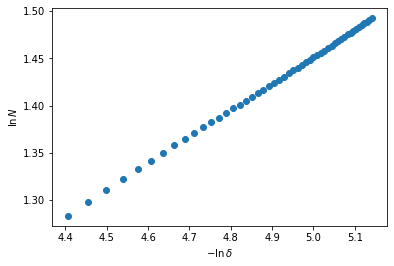

In [39]:


minus_delta1_log, N1_log, slope, intercept = convert_to_plot(N1_average, M1_average)
print("fractal dimension, df =", slope)
plt.plot(minus_delta1_log, N1_log, "o")
plt.xlabel(r"$-\ln\,\delta$")
plt.ylabel(r"$\ln\,N$")

## Analysis

In [2]:
dir_data = "../data/number_length/p=0.25,alpha=2/"
dir_figure = "../figures/fractal-dimension/"
print(os.listdir(dir_data))
signature = "fractal_dimension_alpha_2_p_0_25"

['StochasticFragmentationNumberLength_time-iteration_1000000_ensemble_10000_20200919_210411.txt', 'StochasticFragmentationNumberLength_time-iteration_1000000_ensemble_10000_20200920_051248.txt', 'StochasticFragmentationNumberLength_time-iteration_1000000_ensemble_10000_20200919_165241.txt', 'StochasticFragmentationNumberLength_time-iteration_1000000_ensemble_10000_20200920_151121.txt']


In [3]:
def convert_to_plot(N1_average, M1_average):
    N1_log = np.log(N1_average)
    minus_delta1_log = N1_log - np.log(M1_average)
    slope, intercept = np.polyfit(minus_delta1_log, N1_log, 1)
    return minus_delta1_log, N1_log, slope, intercept

{'time_iteration': 1000000, 'date_time': '20200919_210411', 'ensemble_size': 10000, 'alpha': 2, 'probability': 0.25, 'desc': {'columns': ['number of particles', 'sum of surviving particle sizes'], 'type': 'ensemble average'}}
[3.6087 3.6621 3.709  3.7508 3.7915 3.825  3.8576 3.8876 3.9126 3.939
 3.9627 3.9835 4.0042 4.024  4.0431 4.0583 4.0768 4.0934 4.1074 4.1232
 4.1404 4.1543 4.1679 4.1813 4.1956 4.2087 4.2214 4.2335 4.2457 4.2559
 4.2666 4.2767 4.2871 4.2976 4.3095 4.3192 4.3304 4.3395 4.3493 4.3604
 4.3716 4.3803 4.3895 4.3988 4.4069 4.4162 4.4246 4.4311 4.4403 4.4472]
{'time_iteration': 1000000, 'date_time': '20200920_051248', 'ensemble_size': 10000, 'alpha': 2, 'probability': 0.25, 'desc': {'columns': ['number of particles', 'sum of surviving particle sizes'], 'type': 'ensemble average'}}
[3.5788 3.6322 3.6774 3.7152 3.7534 3.7875 3.8178 3.8488 3.8757 3.9005
 3.9227 3.9467 3.9678 3.9889 4.0089 4.027  4.0442 4.0599 4.0751 4.0917
 4.1048 4.1189 4.1314 4.1444 4.1591 4.1732 4.1864 4

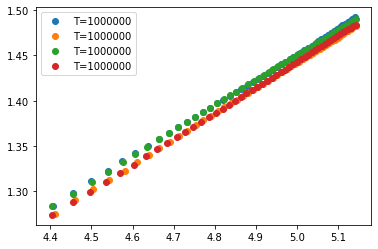

In [4]:
files = glob.glob(dir_data + "*")
for file in files:
    with open(file) as f:
        line = f.readline()
        header = json.loads(line[1:])
        time_iteration = header['time_iteration']
        ensemble_size = header['ensemble_size']
        alpha = header['alpha']
        probability = header['probability']
        print(header)
    data = np.loadtxt(file)
    N1_average, M1_average = data.T
    print(N1_average)
    minus_delta1_log, N1_log, slope, intercept = convert_to_plot(N1_average, M1_average)
    plt.plot(minus_delta1_log, N1_log, 'o', label="T={}".format(time_iteration))
    pass
plt.legend()

In [5]:
def get_mean_data(files):
    data_sum = None
    ensemble_size = 0
    for file in files:
        with open(file) as f:
            line = f.readline()
            header = json.loads(line[1:])
            time_iteration = header['time_iteration']
            En = header['ensemble_size']
            alpha = header['alpha']
            probability = header['probability']
            print(header)
            pass
        data = np.loadtxt(file)
        N1_average, M1_average = data.T
        minus_delta1_log, N1_log, slope, intercept = convert_to_plot(N1_average, M1_average)
        print("slope ", slope)
        if data_sum is None:
            data_sum = data*En
            pass
        else:
            data_sum += data*En
        ensemble_size += En
        pass
    return data_sum / ensemble_size

{'time_iteration': 1000000, 'date_time': '20200919_210411', 'ensemble_size': 10000, 'alpha': 2, 'probability': 0.25, 'desc': {'columns': ['number of particles', 'sum of surviving particle sizes'], 'type': 'ensemble average'}}
slope  0.281265398517281
{'time_iteration': 1000000, 'date_time': '20200920_051248', 'ensemble_size': 10000, 'alpha': 2, 'probability': 0.25, 'desc': {'columns': ['number of particles', 'sum of surviving particle sizes'], 'type': 'ensemble average'}}
slope  0.28237963983840825
{'time_iteration': 1000000, 'date_time': '20200919_165241', 'ensemble_size': 10000, 'alpha': 2, 'probability': 0.25, 'desc': {'columns': ['number of particles', 'sum of surviving particle sizes'], 'type': 'ensemble average'}}
slope  0.27866889206177675
{'time_iteration': 1000000, 'date_time': '20200920_151121', 'ensemble_size': 10000, 'alpha': 2, 'probability': 0.25, 'desc': {'columns': ['number of particles', 'sum of surviving particle sizes'], 'type': 'ensemble average'}}
slope  0.28572328

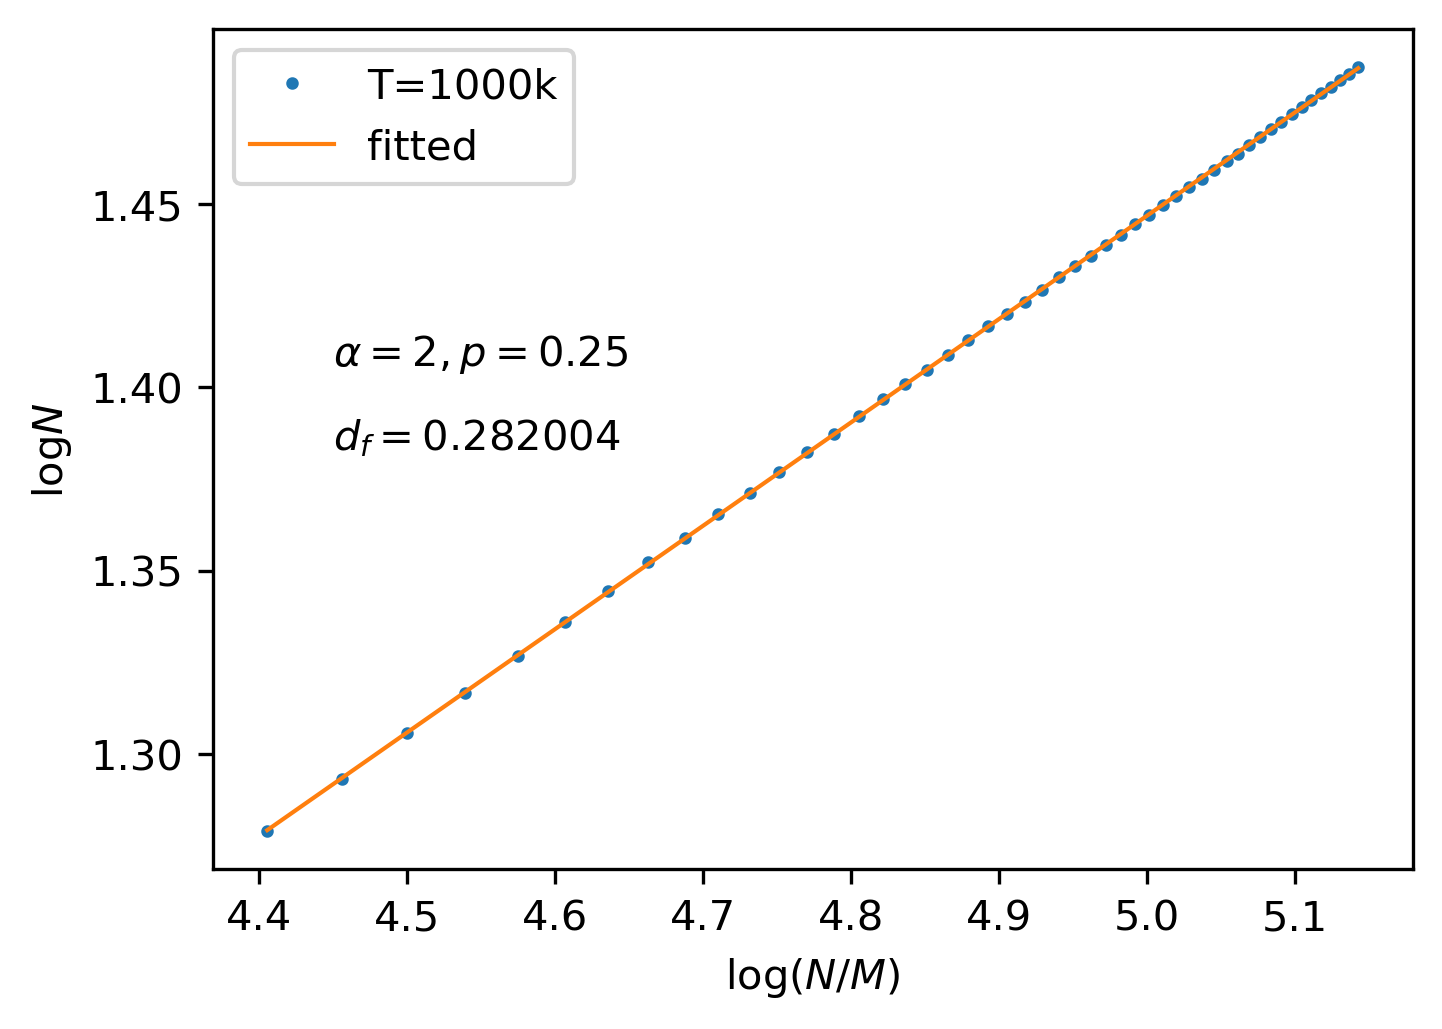

In [13]:
    
files = glob.glob(dir_data + "*")
data = get_mean_data(files)

N1_average, M1_average = data.T
print(N1_average)
minus_delta1_log, N1_log, slope, intercept = convert_to_plot(N1_average, M1_average)

fig, ax = plt.subplots(1, 1, figsize=(5, 3.5), dpi=300)
plt.plot(minus_delta1_log, N1_log, 'o', label="T={}k".format(time_iteration//1000), markersize=2)

y = minus_delta1_log*slope + intercept
plt.plot(minus_delta1_log, y, label="fitted", lw=1)
plt.xlabel(r"$\log (N/M)$")
plt.ylabel(r"$\log N$")
plt.legend()
ax.set_position([0.15, 0.15, 0.8, 0.8])
fig.text(0.1, 0.6, r'$\alpha={}, p={}$'.format(alpha,probability), transform=ax.transAxes)
fig.text(0.1, 0.5, r'$d_f={:.6f}$'.format(slope), transform=ax.transAxes)

filename = dir_figure + signature + ".pdf"
plt.savefig(filename)